# Link prediction for NetworKit

In [1]:
from networkit import *
%matplotlib inline
import matplotlib.pyplot as plt

No module named 'seaborn'


In [2]:
cd ~/Thesis/NetworKit-Esders

/home/xza/Thesis/NetworKit-Esders


In [69]:
G = readGraph("input/caidaRouterLevel.graph", Format.METIS)

In [70]:
partitionedGraph = linkprediction.RandomEdgePartitioner(G).partitionByPercentage(0.3)
G.numberOfEdges()

609066

In [71]:
partitionedGraph[0].numberOfEdges()

426347

In [72]:
partitionedGraph[1].numberOfEdges()

182719

In [73]:
katzIndex = linkprediction.KatzIndex(partitionedGraph[0], 5, 0.005)
commonNeighborsIndex = linkprediction.CommonNeighborsIndex(partitionedGraph[0])
jaccardIndex = linkprediction.JaccardIndex(partitionedGraph[0])
preferentialAttachmentIndex = linkprediction.PreferentialAttachmentIndex(partitionedGraph[0])
adamicAdarIndex = linkprediction.AdamicAdarIndex(partitionedGraph[0])

In [74]:
missingLinks = linkprediction.UnconnectedNodesFinder(partitionedGraph[0]).findAll(2)
len(missingLinks)

8138953

In [55]:
dyadScorePairs = katzIndex.runOnParallel(missingLinks)

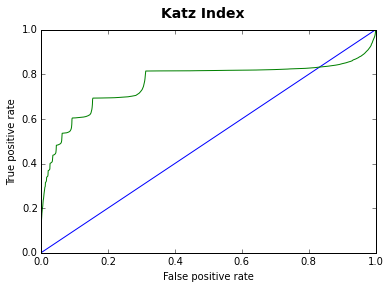

In [56]:
roc = linkprediction.ROCMetric(partitionedGraph[1], dyadScorePairs)
roc.generatePoints()
points = roc.getPoints()
plt.suptitle("Katz Index", fontsize=14, fontweight="bold")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.axis([0, 1, 0, 1])
plt.plot([0, 1], [0, 1])
plt.plot(points[0], points[1])

In [57]:
roc.areaUnderCurve()

0.7602397017696562

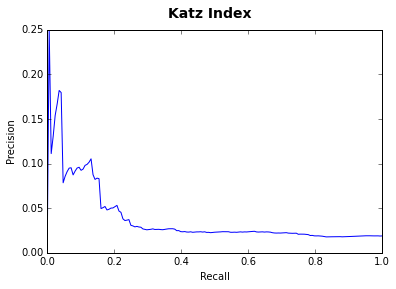

In [43]:
pr = linkprediction.PrecisionRecallMetric(partitionedGraph[1], dyadScorePairs)
pr.generatePoints()
points = pr.getPoints()
plt.suptitle("Katz Index", fontsize=14, fontweight="bold")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot(points[0], points[1])

In [44]:
pr.areaUnderCurve()

0.03837091732968958

In [75]:
dyadScorePairs = commonNeighborsIndex.runOnParallel(missingLinks)

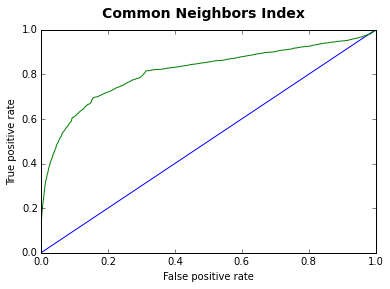

In [59]:
roc = linkprediction.ROCMetric(partitionedGraph[1], dyadScorePairs)
roc.generatePoints()
points = roc.getPoints()
plt.suptitle("Common Neighbors Index", fontsize=14, fontweight="bold")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.axis([0, 1, 0, 1])
plt.plot([0, 1], [0, 1])
plt.plot(points[0], points[1])

In [60]:
roc.areaUnderCurve()

0.8130132875040861

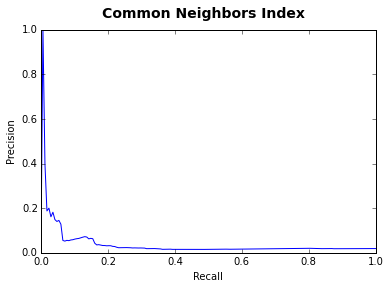

In [48]:
pr = linkprediction.PrecisionRecallMetric(partitionedGraph[1], dyadScorePairs)
pr.generatePoints()
points = pr.getPoints()
plt.suptitle("Common Neighbors Index", fontsize=14, fontweight="bold")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.plot(points[0], points[1])

In [29]:
pr.areaUnderCurve()

0.4816111376943197

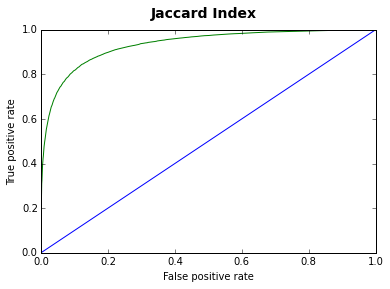

In [61]:
dyadScorePairs = jaccardIndex.runOnParallel(missingLinks)
roc = linkprediction.ROCMetric(partitionedGraph[1], dyadScorePairs)
roc.generatePoints()
points = roc.getPoints()
plt.suptitle("Jaccard Index", fontsize=14, fontweight="bold")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.axis([0, 1, 0, 1])
plt.plot([0, 1], [0, 1])
plt.plot(points[0], points[1])

In [62]:
roc.areaUnderCurve()

0.9330324089979896

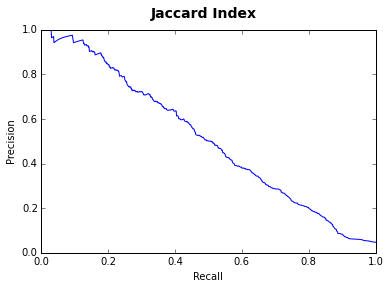

In [32]:
pr = linkprediction.PrecisionRecallMetric(partitionedGraph[1], dyadScorePairs)
pr.generatePoints()
points = pr.getPoints()
plt.suptitle("Jaccard Index", fontsize=14, fontweight="bold")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.plot(points[0], points[1])

In [33]:
pr.areaUnderCurve()

0.5109580967061758

In [63]:
dyadScorePairs = preferentialAttachmentIndex.runOnParallel(missingLinks)

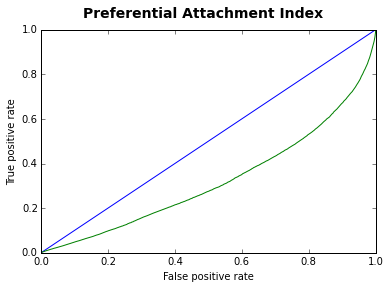

In [64]:
roc = linkprediction.ROCMetric(partitionedGraph[1], dyadScorePairs)
roc.generatePoints()
points = roc.getPoints()
plt.suptitle("Preferential Attachment Index", fontsize=14, fontweight="bold")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.axis([0, 1, 0, 1])
plt.plot([0, 1], [0, 1])
plt.plot(points[0], points[1])

In [65]:
roc.areaUnderCurve()

0.32179511789197235

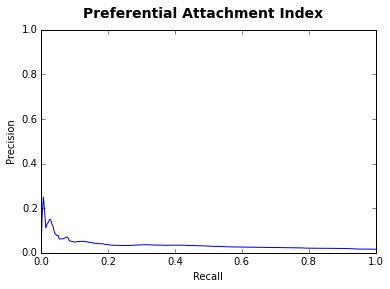

In [22]:
pr = linkprediction.PrecisionRecallMetric(partitionedGraph[1], dyadScorePairs)
pr.generatePoints()
points = pr.getPoints()
plt.suptitle("Preferential Attachment Index", fontsize=14, fontweight="bold")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.plot(points[0], points[1])

In [23]:
pr.areaUnderCurve()

0.0354546093938443

In [66]:
dyadScorePairs = adamicAdarIndex.runOnParallel(missingLinks)

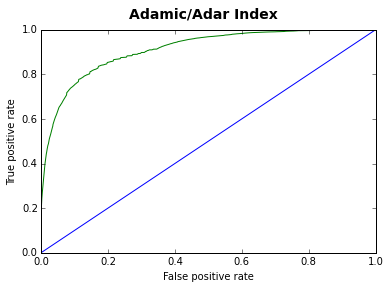

In [67]:
roc = linkprediction.ROCMetric(partitionedGraph[1], dyadScorePairs)
roc.generatePoints()
points = roc.getPoints()
plt.suptitle("Adamic/Adar Index", fontsize=14, fontweight="bold")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.axis([0, 1, 0, 1])
plt.plot([0, 1], [0, 1])
plt.plot(points[0], points[1])

In [68]:
roc.areaUnderCurve()

0.9104089426132046

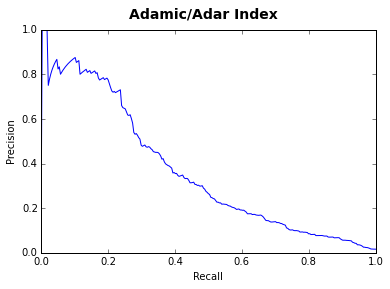

In [26]:
pr = linkprediction.PrecisionRecallMetric(partitionedGraph[1], dyadScorePairs)
pr.generatePoints()
points = pr.getPoints()
plt.suptitle("Adamic/Adar Index", fontsize=14, fontweight="bold")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.plot(points[0], points[1])

In [27]:
pr.areaUnderCurve()

0.3648976885200627

In [28]:
node = partitionedGraph[0].randomNode()
nodes = partitionedGraph[0].neighbors(node)

subGraph = graph.Subgraph().fromNodes(partitionedGraph[0], nodes)

In [29]:
LIST_LENGTH = len(nodes) - 1
a = []
color = {}
while len(a) < LIST_LENGTH:
    a.append(500)
for e in nodes:
    color[e] = len(nodes)
a.append(2000)
len(color)
color[list(color)[-1]] = len(nodes) / 2
color[list(color)[-2]] = len(nodes) / 3

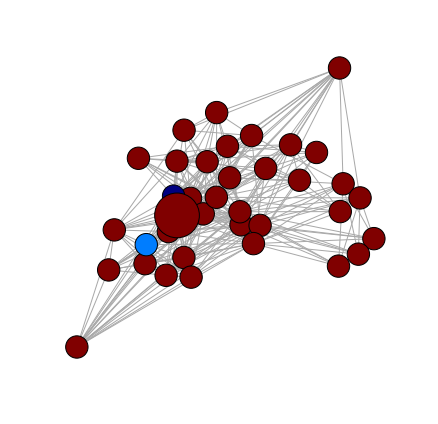

In [30]:
viztasks.drawGraph(subGraph, (7,7), False, a, None, color)

In [31]:
crossValidator = linkprediction.KFoldCrossValidator(G, commonNeighborsIndex, roc)
crossValidator.crossValidate(10)

0.8767154547596337